In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, classification_report, f1_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, TargetEncoder,StandardScaler
from sklearn.decomposition import PCA


In [2]:
data1 = pd.read_csv(r'H:\DATA\MY\practice\Practice-35\fb.csv')
data2 = pd.read_csv(r'H:\DATA\MY\practice\Practice-35\nf.csv')
data3 = pd.read_csv(r'H:\DATA\MY\practice\Practice-35\train.csv')
data1.head()

,id,type,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
0,1,video,529,512,262,432,92,3,1,1,0
1,2,photo,150,0,0,150,0,0,0,0,0
2,3,video,227,236,57,204,21,1,1,0,0
3,4,photo,111,0,0,111,0,0,0,0,0
4,5,photo,213,0,0,204,9,0,0,0,0


In [3]:
print(data1.shape)
print(data1.nunique())

(7050, 11)
id           7050
type            4
reactions    1067
comments      993
shares        501
likes        1044
loves         229
wows           65
hahas          42
sads           24
angrys         14
dtype: int64


In [4]:
data = data1.drop('id',axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       7050 non-null   object
 1   reactions  7050 non-null   int64 
 2   comments   7050 non-null   int64 
 3   shares     7050 non-null   int64 
 4   likes      7050 non-null   int64 
 5   loves      7050 non-null   int64 
 6   wows       7050 non-null   int64 
 7   hahas      7050 non-null   int64 
 8   sads       7050 non-null   int64 
 9   angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [6]:
print(data.isnull().sum())

type         0
reactions    0
comments     0
shares       0
likes        0
loves        0
wows         0
hahas        0
sads         0
angrys       0
dtype: int64


In [7]:
for column in data.columns:
  print(f'the unique count for the {column} feature : {data[column].nunique()}')

the unique count for the type feature : 4
the unique count for the reactions feature : 1067
the unique count for the comments feature : 993
the unique count for the shares feature : 501
the unique count for the likes feature : 1044
the unique count for the loves feature : 229
the unique count for the wows feature : 65
the unique count for the hahas feature : 42
the unique count for the sads feature : 24
the unique count for the angrys feature : 14


C:\Users\mouncef\AppData\Local\Temp\ipykernel_15828\2003706682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

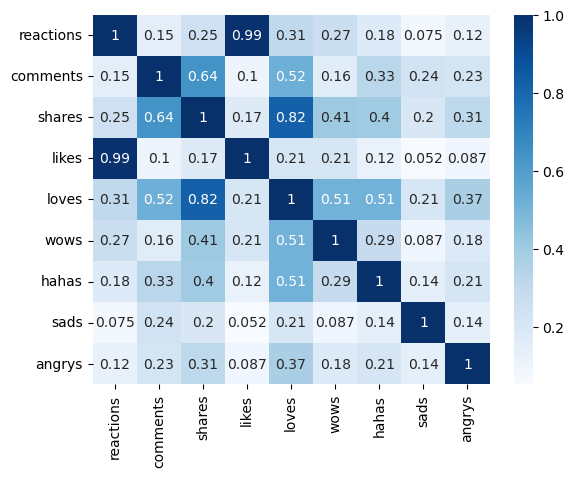

In [8]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot= True, cmap= 'Blues')

In [9]:
print(Counter(data['type']))
data1 = data1[data1['type'] != 'link']
data = data1

Counter({'photo': 4288, 'video': 2334, 'status': 365, 'link': 63})


In [10]:
model = RandomForestClassifier(random_state= 42, class_weight='balanced')
encoder = LabelEncoder()
Y = encoder.fit_transform(data['type'])
X = data.drop('type', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_pred = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,  average='weighted')
report = classification_report(y_test, y_pred)

print(f'the accuracy score for the training data : {accuracy_train * 100:.2f}%')
print(f'the accuracy score for the testing data : {accuracy * 100:.2f}%')
print(f'the F1-score for the testing data : {f1 * 100:.2f}%')
print(report)

the accuracy score for the training data : 100.00%
the accuracy score for the testing data : 88.70%
the F1-score for the testing data : 87.89%
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       844
           1       0.57      0.28      0.38        82
           2       0.94      0.88      0.91       472

    accuracy                           0.89      1398
   macro avg       0.80      0.70      0.73      1398
weighted avg       0.88      0.89      0.88      1398



In [11]:
model = KNeighborsClassifier(n_neighbors= 5)

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_pred = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,  average='weighted')
report = classification_report(y_test, y_pred)

print(f'the accuracy score for the training data : {accuracy_train * 100:.2f}%')
print(f'the accuracy score for the testing data : {accuracy * 100:.2f}%')
print(f'the F1-score for the testing data : {f1 * 100:.2f}%')
print(report)

the accuracy score for the training data : 90.03%
the accuracy score for the testing data : 85.84%
the F1-score for the testing data : 85.13%
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       844
           1       0.57      0.33      0.42        82
           2       0.93      0.78      0.85       472

    accuracy                           0.86      1398
   macro avg       0.78      0.69      0.72      1398
weighted avg       0.86      0.86      0.85      1398



In [12]:
import xgboost as xgb


model = xgb.XGBClassifier()


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred , average='weighted')
report = classification_report(y_test, y_pred)

print(f'Training accuracy : {accuracy_train * 100:.2f}%')
print(f'Testing accuracy : {accuracy * 100:.2f}%')
print(f'F1-score : {f1 * 100:.2f}%')
print(report)


Training accuracy : 97.89%
Testing accuracy : 89.63%
F1-score : 88.83%
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       844
           1       0.60      0.29      0.39        82
           2       0.95      0.89      0.92       472

    accuracy                           0.90      1398
   macro avg       0.81      0.71      0.74      1398
weighted avg       0.89      0.90      0.89      1398



In [13]:
models = [xgb.XGBClassifier(), RandomForestClassifier(),KNeighborsClassifier()]

for model in models:
  cv_score = cross_val_score(model, X, Y, scoring='accuracy')
  print(f'{model} results')
  print('Cross validatiion score : ', cv_score)
  print('Mean Cross validation score : ', cv_score.mean())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) results
Cross validatiion score :  [0.38125894 0.83834049 0.72154617 0.5984252  0.34645669]
Mean Cross validation score :  0.5772054975765563
RandomForestClassifier() results
Cross validatiion score :  [0.37482117 0.71530758 0.86757337 0.5447

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       844
           1       0.42      0.67      0.52        82
           2       0.91      0.89      0.90       472

    accuracy                           0.87      1398
   macro avg       0.75      0.81      0.77      1398
weighted avg       0.89      0.87      0.88      1398



<Axes: >

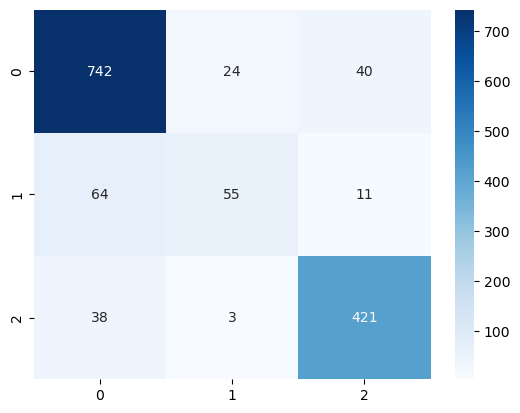

In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)

# Train the model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt= 'd', cmap= 'Blues')

In [15]:
cr_score = cross_val_score(KNeighborsClassifier(), X_train_resampled, y_train_resampled, scoring= 'accuracy')

print('Cross validation score : ',cv_score)


Cross validation score :  [0.15021459 0.54649499 0.31925555 0.39656407 0.30136006]


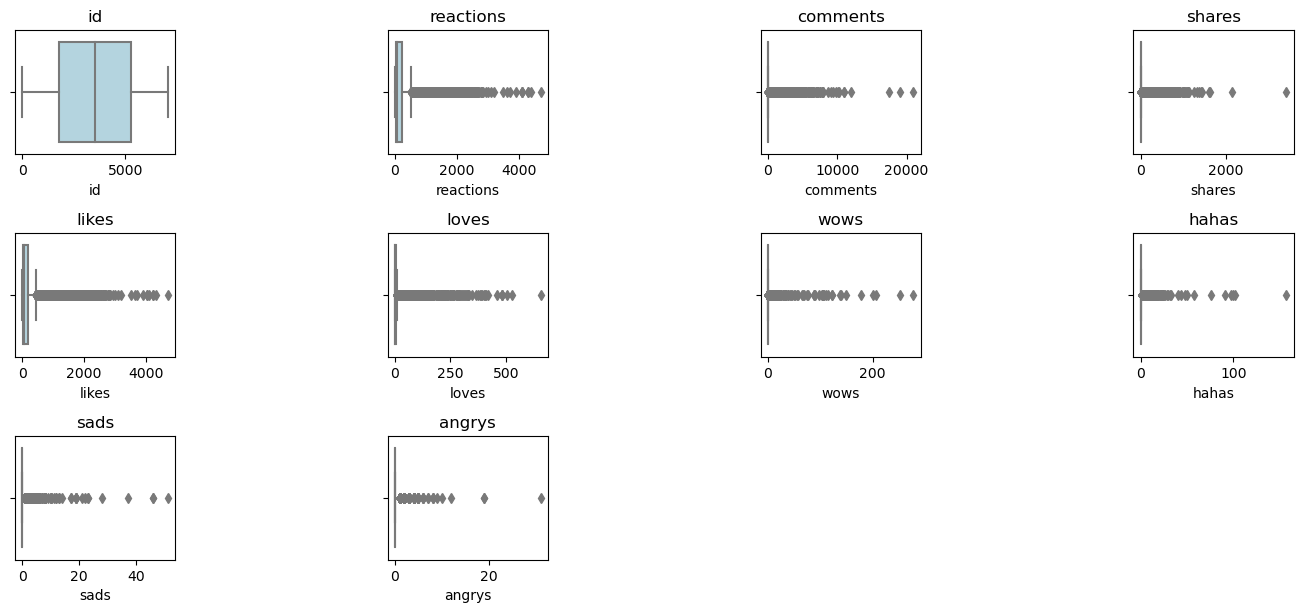

In [16]:
numeric_data = data.select_dtypes(include='number').columns

plt.figure(figsize=(15, len(numeric_data) * 2))
for i, column in enumerate(numeric_data):
    plt.subplot(len(numeric_data), 8, 2*i + 1)
    sns.boxplot(data=data, x=column, color='lightblue')
    plt.title(column)
# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
pca = PCA(n_components= 0.95)

x_pca = pca.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size= 0.2, random_state= 42)

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report  = classification_report(y_test, y_pred)

print('the accuracy : ',accuracy)
print(report)

cv_score = cross_val_score(model, x_pca, Y, scoring= 'accuracy')
print('cross validation score : ',cv_score)

the accuracy :  0.8555078683834049
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       844
           1       0.56      0.23      0.33        82
           2       0.90      0.81      0.85       472

    accuracy                           0.86      1398
   macro avg       0.77      0.66      0.69      1398
weighted avg       0.85      0.86      0.85      1398

cross validation score :  [0.12160229 0.76323319 0.26198998 0.56979241 0.30780243]


In [18]:
######################### this is for data 2

data2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [19]:
data = data2
print(data.shape)

(8807, 11)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [21]:
print(data.nunique())

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
dtype: int64


In [22]:
data = data.drop(columns=['show_id','title','cast','date_added'])
data.head()

,type,director,country,release_year,rating,duration,listed_in
0,Movie,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,TV Show,NaN,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Julien Leclercq,NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,NaN,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [23]:
print(data.isnull().sum())

type               0
director        2634
country          831
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64


In [24]:
data['director'].fillna('unknown', inplace= True)
data['country'].fillna('unknown', inplace= True)
data['rating'].fillna(data['rating'].mode()[0], inplace= True)
data['duration'].fillna(data['duration'].mode()[0], inplace= True)
print(data.isnull().sum())


type            0
director        0
country         0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [25]:
from sklearn.cluster import KMeans

encoder = LabelEncoder()

for column in data.columns:
  if data[column].dtype == object:
    data[column] = encoder.fit_transform(data[column])

k = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Get the cluster labels
data['cluster'] = kmeans.labels_


In [26]:
data['cluster'].head()

0    2
1    0
2    2
3    0
4    0
Name: cluster, dtype: int32

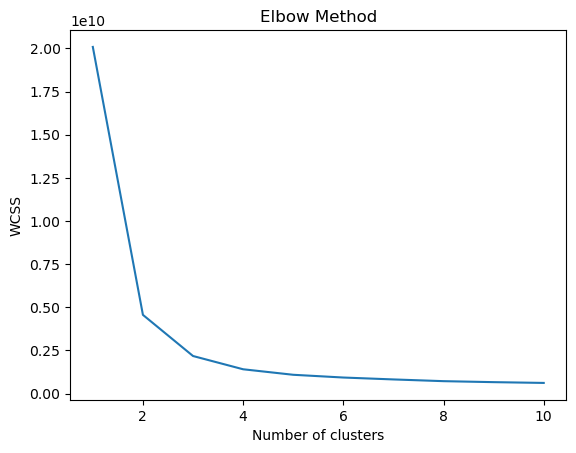

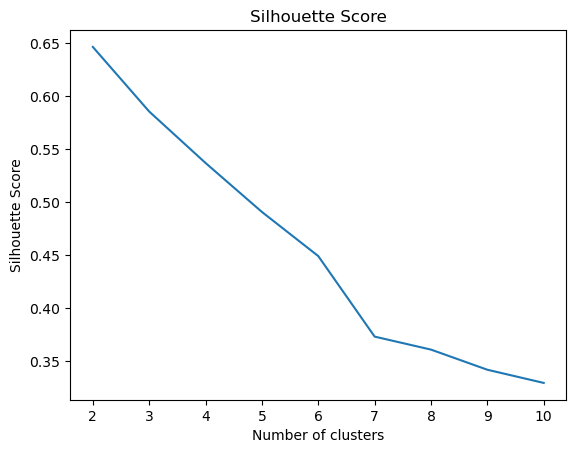

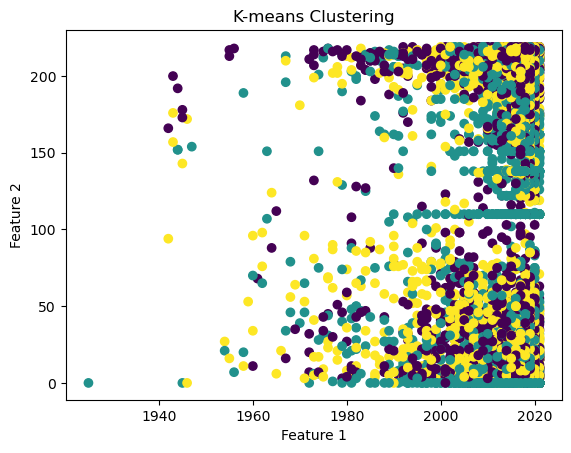

In [27]:
from sklearn.metrics import silhouette_score

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score
silhouette_scores = []
for i in range(2, 11):  # Start from 2 for silhouette score
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Fit K-means with the optimal number of clusters
optimal_k = 3  # Replace with the optimal k from elbow/silhouette analysis
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
data['cluster'] = kmeans.fit_predict(data)

# Visualizing clusters (if 2D or using PCA)
plt.scatter(data['release_year'], data['duration'], c=data['cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [28]:
###########################3 this is data 3

data3.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4
1,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2
2,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2
3,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,3
4,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,3


In [29]:
data = data3
print(data.shape)

(6665, 11)


In [30]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 572.9+ KB
None
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation    

In [31]:
data = data.drop('ID', axis = 1)

for column in data.columns:
  print(column)
  print(Counter(data[column]))
  print('---------')

Gender
Counter({'Male': 3677, 'Female': 2988})
---------
Ever_Married
Counter({'Yes': 3944, 'No': 2721})
---------
Age
Counter({35: 211, 42: 202, 37: 192, 27: 188, 40: 188, 38: 188, 43: 186, 33: 185, 28: 181, 32: 180, 36: 177, 25: 176, 39: 174, 41: 172, 31: 171, 26: 170, 30: 160, 50: 155, 29: 149, 45: 144, 47: 139, 53: 139, 48: 134, 46: 134, 52: 133, 49: 129, 51: 129, 23: 108, 22: 107, 18: 107, 19: 104, 21: 95, 20: 94, 55: 85, 59: 81, 60: 81, 56: 79, 61: 79, 57: 73, 63: 70, 62: 69, 65: 65, 58: 64, 70: 62, 66: 60, 69: 58, 68: 56, 72: 53, 73: 46, 67: 43, 71: 43, 82: 32, 81: 32, 83: 28, 75: 27, 89: 27, 77: 27, 88: 26, 84: 25, 79: 24, 74: 24, 86: 24, 76: 23, 78: 23, 87: 23, 80: 16, 85: 16})
---------
Graduated
Counter({'Yes': 4249, 'No': 2416})
---------
Profession
Counter({'Artist': 2192, 'Healthcare': 1077, 'Entertainment': 809, 'Doctor': 592, 'Engineer': 582, 'Executive': 505, 'Lawyer': 500, 'Marketing': 233, 'Homemaker': 175})
---------
Work_Experience
Counter({1.0: 2187, 0.0: 2133, 9.

In [32]:
# here we are performing random forest classifier , we are aiming to predict the segmentation features hence its the target variable
# we need first to encode the data before evaluating the model

model = RandomForestClassifier()
encoder = LabelEncoder()
X = data.drop('Segmentation', axis = 1)
Y = data['Segmentation']

for column in X.columns:
  if X[column].dtype == object:
    X[column] = encoder.fit_transform(X[column])
    
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('the Training Accuracy : ', accuracy_train)
print('the Testing Accuracy : ', accuracy)
print(report)

the Training Accuracy :  0.9613653413353338
the Testing Accuracy :  0.4943735933983496
              precision    recall  f1-score   support

           1       0.42      0.43      0.42       315
           2       0.38      0.35      0.36       302
           3       0.50      0.51      0.50       346
           4       0.64      0.66      0.65       370

    accuracy                           0.49      1333
   macro avg       0.48      0.49      0.48      1333
weighted avg       0.49      0.49      0.49      1333



In [33]:
cv_score = cross_val_score(model, X, Y, scoring= 'accuracy')

print('the cross validation score : ', cv_score)
print('the mean cross validation score : ', cv_score.mean())

the cross validation score :  [0.49962491 0.48312078 0.48312078 0.48312078 0.50262566]
the mean cross validation score :  0.4903225806451613


In [34]:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

pca = PCA(n_components= 0.95)

x_pca = pca.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size= 0.2, random_state= 42)

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('training accuracy : ', accuracy_train)
print('testing accuracy : ', accuracy)
print(report)

training accuracy :  0.9613653413353338
testing accuracy :  0.4913728432108027
              precision    recall  f1-score   support

           1       0.40      0.39      0.40       315
           2       0.37      0.35      0.36       302
           3       0.53      0.53      0.53       346
           4       0.62      0.65      0.64       370

    accuracy                           0.49      1333
   macro avg       0.48      0.48      0.48      1333
weighted avg       0.49      0.49      0.49      1333



In [35]:
cv_score = cross_val_score(model, x_pca, Y, scoring = 'accuracy')

print('cross validation score : ', cv_score)

cross validation score :  [0.49062266 0.48687172 0.49062266 0.48687172 0.48312078]


In [36]:
model = KNeighborsClassifier(n_neighbors= 5)

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('training accuracy : ', accuracy_train)
print('testing accuracy : ', accuracy)
print(report)

training accuracy :  0.6312828207051763
testing accuracy :  0.47936984246061515
              precision    recall  f1-score   support

           1       0.39      0.47      0.43       315
           2       0.35      0.33      0.34       302
           3       0.54      0.53      0.54       346
           4       0.62      0.56      0.59       370

    accuracy                           0.48      1333
   macro avg       0.48      0.47      0.47      1333
weighted avg       0.49      0.48      0.48      1333



In [37]:
model = xgb.XGBClassifier()

Y = LabelEncoder().fit_transform(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred , average='weighted')
report = classification_report(y_test, y_pred)

print(f'Training accuracy : {accuracy_train * 100:.2f}%')
print(f'Testing accuracy : {accuracy * 100:.2f}%')
print(f'F1-score : {f1 * 100:.2f}%')
print(report)

Training accuracy : 81.17%
Testing accuracy : 50.41%
F1-score : 50.04%
              precision    recall  f1-score   support

           0       0.41      0.42      0.41       315
           1       0.37      0.31      0.33       302
           2       0.53      0.57      0.55       346
           3       0.66      0.67      0.67       370

    accuracy                           0.50      1333
   macro avg       0.49      0.49      0.49      1333
weighted avg       0.50      0.50      0.50      1333



In [38]:
# the model is doing very terrible ,this could be due to the outliers in the training data, i cannot ensure if the issue is an overfitting or underfitting
# we need to take out those outliers if they exist, we cannot perform boxplot test to check for that since most of the variables are qualitative hence we are using 
# isolation forest algorithm the check in delete 10% of the extreme values in the data
from sklearn.ensemble import IsolationForest

for column in data.columns:
  if data[column].dtype == object:
    data[column] = LabelEncoder().fit_transform(data[column])

iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model
iso_forest.fit(data)

# Predict anomalies (-1 means anomaly, 1 means normal)
predictions = iso_forest.predict(data)

# Add predictions to the original dataset
data['anomaly'] = predictions
print(data['anomaly'].value_counts())

data = data[data['anomaly'] == 1]
data = data.drop('anomaly', axis = 1)

 1    5998
-1     667
Name: anomaly, dtype: int64


In [39]:
model = RandomForestClassifier()

X = data.drop('Segmentation', axis = 1)
Y = data['Segmentation']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('training accuracy : ', accuracy_train)
print('testing accuracy : ', accuracy)
print(report)

training accuracy :  0.9562317632346811
testing accuracy :  0.5008333333333334
              precision    recall  f1-score   support

           1       0.44      0.43      0.43       279
           2       0.37      0.34      0.36       296
           3       0.50      0.53      0.52       328
           4       0.68      0.69      0.68       297

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.50      1200
weighted avg       0.50      0.50      0.50      1200



In [40]:
model = xgb.XGBClassifier()

Y = LabelEncoder().fit_transform(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred , average='weighted')
report = classification_report(y_test, y_pred)

print(f'Training accuracy : {accuracy_train * 100:.2f}%')
print(f'Testing accuracy : {accuracy * 100:.2f}%')
print(f'F1-score : {f1 * 100:.2f}%')
print(report)

Training accuracy : 80.80%
Testing accuracy : 51.67%
F1-score : 51.38%
              precision    recall  f1-score   support

           0       0.47      0.44      0.46       279
           1       0.38      0.35      0.37       296
           2       0.53      0.58      0.55       328
           3       0.66      0.68      0.67       297

    accuracy                           0.52      1200
   macro avg       0.51      0.51      0.51      1200
weighted avg       0.51      0.52      0.51      1200



In [41]:
cv_score = cross_val_score(model, X, Y, scoring='accuracy')

print('cross validation score : ', cv_score)

cross validation score :  [0.53666667 0.5025     0.5275     0.53377815 0.53377815]


In [42]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

pca = PCA(n_components= 0.95)

x_pca = pca.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size= 0.2, random_state= 42)

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('training accuracy : ', accuracy_train)
print('testing accuracy : ', accuracy)
print(report)

training accuracy :  0.9562317632346811
testing accuracy :  0.5133333333333333
              precision    recall  f1-score   support

           0       0.45      0.39      0.42       279
           1       0.41      0.41      0.41       296
           2       0.52      0.54      0.53       328
           3       0.66      0.70      0.68       297

    accuracy                           0.51      1200
   macro avg       0.51      0.51      0.51      1200
weighted avg       0.51      0.51      0.51      1200



In [43]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred , average='weighted')
report = classification_report(y_test, y_pred)

print(f'Training accuracy : {accuracy_train * 100:.2f}%')
print(f'Testing accuracy : {accuracy * 100:.2f}%')
print(f'F1-score : {f1 * 100:.2f}%')
print(report)

Training accuracy : 93.31%
Testing accuracy : 50.83%
F1-score : 50.57%
              precision    recall  f1-score   support

           0       0.44      0.42      0.43       279
           1       0.39      0.36      0.38       296
           2       0.52      0.56      0.54       328
           3       0.66      0.68      0.67       297

    accuracy                           0.51      1200
   macro avg       0.50      0.51      0.50      1200
weighted avg       0.50      0.51      0.51      1200



In [44]:
cv_score = cross_val_score(model, x_pca, Y, scoring='accuracy')

print('cross validation score : ', cv_score)


cross validation score :  [0.52083333 0.49916667 0.49833333 0.50959133 0.51876564]


In [45]:
test = pd.read_csv(r'H:\DATA\MY\practice\Practice-35\test.csv')

test = test.drop('ID', axis = 1)

for column in test.columns:
  if test[column].dtype == object:
    test[column] = encoder.fit_transform(test[column])

In [46]:
model = RandomForestClassifier()

X = data.drop('Segmentation', axis = 1)
Y = data['Segmentation']

model.fit(X,Y)

y_train_pred = model.predict(X)
# y_pred = model.predict(test)

# test['Seg_pred'] = y_pred
accuracy = accuracy_score(Y, y_train_pred)
report = classification_report(Y, y_train_pred)

print('accuracy score : ',accuracy)
print(report)


accuracy score :  0.9496498832944315
              precision    recall  f1-score   support

           1       0.96      0.94      0.95      1365
           2       0.94      0.92      0.93      1469
           3       0.93      0.95      0.94      1649
           4       0.98      0.98      0.98      1515

    accuracy                           0.95      5998
   macro avg       0.95      0.95      0.95      5998
weighted avg       0.95      0.95      0.95      5998



In [47]:
cv_score = cross_val_score(model, X, Y, scoring = 'accuracy')

print('cross validation score : ',cv_score)

cross validation score :  [0.51083333 0.48083333 0.48333333 0.49291076 0.51376147]
